<h1 style="text-align: center; background-color: skyblue; color: maroon; padding: 20px; border-radius: 5px;"> Chronic Kidney Disease Data Analysis </|h1>

### 1. Importing the packages

In [31]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

### 2. Loading the dataset

In [32]:
chronic_data=pd.read_csv("chronic_kidney.csv")

#### Checking top 5 rows of the dataset

In [33]:
chronic_data.head()

,Bp,Sg,Al,Su,Rbc,Bu,Sc,Sod,Pot,Hemo,Wbcc,Rbcc,Htn,Class
0,80.0,1.020,1.0,0.0,1.0,36.0,1.2,137.53,4.63,15.4,7800.0,5.20,1.0,1
1,50.0,1.020,4.0,0.0,1.0,18.0,0.8,137.53,4.63,11.3,6000.0,4.71,0.0,1
2,80.0,1.010,2.0,3.0,1.0,53.0,1.8,137.53,4.63,9.6,7500.0,4.71,0.0,1
3,70.0,1.005,4.0,0.0,1.0,56.0,3.8,111.00,2.50,11.2,6700.0,3.90,1.0,1
4,80.0,1.010,2.0,0.0,1.0,26.0,1.4,137.53,4.63,11.6,7300.0,4.60,0.0,1


#### Checking the shape of the dataset

In [34]:
chronic_data.shape

(400, 14)

#### Viewing the datatypes of the dataset

In [35]:
chronic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Bp      400 non-null    float64
 1   Sg      400 non-null    float64
 2   Al      400 non-null    float64
 3   Su      400 non-null    float64
 4   Rbc     400 non-null    float64
 5   Bu      400 non-null    float64
 6   Sc      400 non-null    float64
 7   Sod     400 non-null    float64
 8   Pot     400 non-null    float64
 9   Hemo    400 non-null    float64
 10  Wbcc    400 non-null    float64
 11  Rbcc    400 non-null    float64
 12  Htn     400 non-null    float64
 13  Class   400 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 43.9 KB


#### Viewing the statistics of the data

In [36]:
chronic_data.describe()

,Bp,Sg,Al,Su,Rbc,Bu,Sc,Sod,Pot,Hemo,Wbcc,Rbcc,Htn,Class
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.00000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,76.455000,1.017712,1.015000,0.395000,0.882500,57.40550,3.07235,137.529025,4.627850,12.526900,8406.090000,4.708275,0.369350,0.625000
std,13.476536,0.005434,1.272329,1.040038,0.322418,49.28597,5.61749,9.204273,2.819783,2.716171,2523.219976,0.840315,0.482023,0.484729
min,50.000000,1.005000,0.000000,0.000000,0.000000,1.50000,0.40000,4.500000,2.500000,3.100000,2200.000000,2.100000,0.000000,0.000000
25%,70.000000,1.015000,0.000000,0.000000,1.000000,27.00000,0.90000,135.000000,4.000000,10.875000,6975.000000,4.500000,0.000000,0.000000
50%,78.000000,1.020000,1.000000,0.000000,1.000000,44.00000,1.40000,137.530000,4.630000,12.530000,8406.000000,4.710000,0.000000,1.000000
75%,80.000000,1.020000,2.000000,0.000000,1.000000,61.75000,3.07000,141.000000,4.800000,14.625000,9400.000000,5.100000,1.000000,1.000000
max,180.000000,1.025000,5.000000,5.000000,1.000000,391.00000,76.00000,163.000000,47.000000,17.800000,26400.000000,8.000000,1.000000,1.000000


### 3. Data Cleaning

##### a. Checking the null values

In [37]:
chronic_data.isnull().sum()

Bp       0
Sg       0
Al       0
Su       0
Rbc      0
Bu       0
Sc       0
Sod      0
Pot      0
Hemo     0
Wbcc     0
Rbcc     0
Htn      0
Class    0
dtype: int64

#### b. Renaming the columns

In [38]:
chronic_data.rename(columns = {'Bp':'Blood_Pressure','Sg':'Specific_Gravity','Al':'Albumin','Su':'Sugar','Rbc':'Red_Blood_Cell','Bu':'Blood_Urea','Sc':'Serum_Creatinine','Sod':'Sodium','Pot':'Pottasium','Hemo':'Hemoglobin','Wbcc':'White_Blood_Cell_Count','Rbcc':'Red_Blood_Cell_Count','Htn':'Hypertension'}, inplace = True)

In [39]:
chronic_data

,Blood_Pressure,Specific_Gravity,Albumin,Sugar,Red_Blood_Cell,Blood_Urea,Serum_Creatinine,Sodium,Pottasium,Hemoglobin,White_Blood_Cell_Count,Red_Blood_Cell_Count,Hypertension,Class
0,80.0,1.020,1.0,0.0,1.0,36.0,1.2,137.53,4.63,15.4,7800.0,5.20,1.0,1
1,50.0,1.020,4.0,0.0,1.0,18.0,0.8,137.53,4.63,11.3,6000.0,4.71,0.0,1
2,80.0,1.010,2.0,3.0,1.0,53.0,1.8,137.53,4.63,9.6,7500.0,4.71,0.0,1
3,70.0,1.005,4.0,0.0,1.0,56.0,3.8,111.00,2.50,11.2,6700.0,3.90,1.0,1
4,80.0,1.010,2.0,0.0,1.0,26.0,1.4,137.53,4.63,11.6,7300.0,4.60,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,80.0,1.020,0.0,0.0,1.0,49.0,0.5,150.00,4.90,15.7,6700.0,4.90,0.0,0
396,70.0,1.025,0.0,0.0,1.0,31.0,1.2,141.00,3.50,16.5,7800.0,6.20,0.0,0
397,80.0,1.020,0.0,0.0,1.0,26.0,0.6,137.00,4.40,15.8,6600.0,5.40,0.0,0
398,60.0,1.025,0.0,0.0,1.0,50.0,1.0,135.00,4.90,14.2,7200.0,5.90,0.0,0


#### c. Changing the datatype of the columns

In [40]:
chronic_data = chronic_data.astype({"Blood_Pressure": 'int', "Albumin": 'int','Sugar':'int','Red_Blood_Cell':'int','Blood_Urea':'int','White_Blood_Cell_Count':'int','Hypertension':'int'})

In [41]:
chronic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Blood_Pressure          400 non-null    int32  
 1   Specific_Gravity        400 non-null    float64
 2   Albumin                 400 non-null    int32  
 3   Sugar                   400 non-null    int32  
 4   Red_Blood_Cell          400 non-null    int32  
 5   Blood_Urea              400 non-null    int32  
 6   Serum_Creatinine        400 non-null    float64
 7   Sodium                  400 non-null    float64
 8   Pottasium               400 non-null    float64
 9   Hemoglobin              400 non-null    float64
 10  White_Blood_Cell_Count  400 non-null    int32  
 11  Red_Blood_Cell_Count    400 non-null    float64
 12  Hypertension            400 non-null    int32  
 13  Class                   400 non-null    int64  
dtypes: float64(6), int32(7), int64(1)
memory u

### 4. Data Analysis

In [82]:
def kde_plot(feature):
    grid = sns.FacetGrid(chronic_data, hue="Class", aspect = 2)
    grid.map(sns.kdeplot, feature)
    grid.add_legend()

#### Range of RBC count in CKD patients

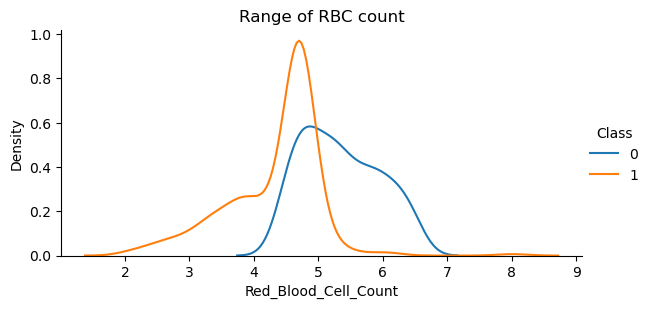

In [48]:
kde_plot('Red_Blood_Cell_Count')
plt.title("Range of RBC count")
plt.show()

#### Range of Hemoglobin in CKD patients

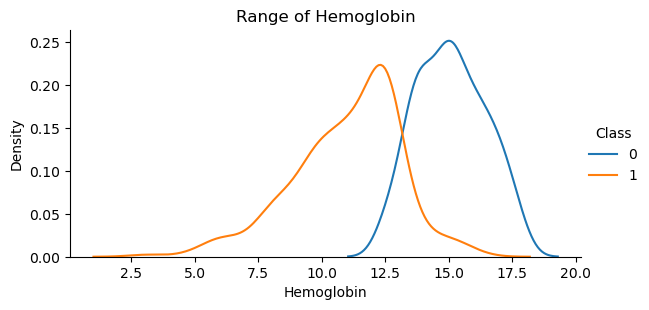

In [49]:
kde_plot('Hemoglobin')
plt.title("Range of Hemoglobin")
plt.show()

#### Is Hypertension related to CKD?

In [54]:
chronic_data

,Blood_Pressure,Specific_Gravity,Albumin,Sugar,Red_Blood_Cell,Blood_Urea,Serum_Creatinine,Sodium,Pottasium,Hemoglobin,White_Blood_Cell_Count,Red_Blood_Cell_Count,Hypertension,Class
0,80,1.020,1,0,1,36,1.2,137.53,4.63,15.4,7800,5.20,1,1
1,50,1.020,4,0,1,18,0.8,137.53,4.63,11.3,6000,4.71,0,1
2,80,1.010,2,3,1,53,1.8,137.53,4.63,9.6,7500,4.71,0,1
3,70,1.005,4,0,1,56,3.8,111.00,2.50,11.2,6700,3.90,1,1
4,80,1.010,2,0,1,26,1.4,137.53,4.63,11.6,7300,4.60,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,80,1.020,0,0,1,49,0.5,150.00,4.90,15.7,6700,4.90,0,0
396,70,1.025,0,0,1,31,1.2,141.00,3.50,16.5,7800,6.20,0,0
397,80,1.020,0,0,1,26,0.6,137.00,4.40,15.8,6600,5.40,0,0
398,60,1.025,0,0,1,50,1.0,135.00,4.90,14.2,7200,5.90,0,0


In [62]:
chronic_hyp=chronic_data[chronic_data["Class"]==1].groupby("Hypertension").size()
chronic_hyp

Hypertension
0    103
1    147
dtype: int64

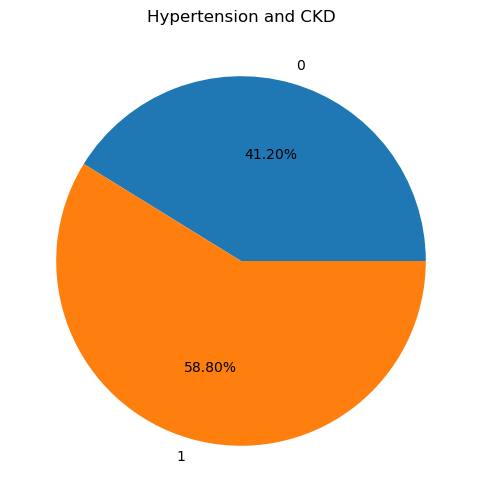

In [66]:
chronic_hyp.plot(kind='pie',autopct="%.2f%%",figsize=(12,6))
plt.title("Hypertension and CKD")
plt.show()

#### Average WBC count in CKD patients

In [77]:
WBC=chronic_data[chronic_data["Class"]==1]
WBC

,Blood_Pressure,Specific_Gravity,Albumin,Sugar,Red_Blood_Cell,Blood_Urea,Serum_Creatinine,Sodium,Pottasium,Hemoglobin,White_Blood_Cell_Count,Red_Blood_Cell_Count,Hypertension,Class
0,80,1.020,1,0,1,36,1.2,137.53,4.63,15.40,7800,5.20,1,1
1,50,1.020,4,0,1,18,0.8,137.53,4.63,11.30,6000,4.71,0,1
2,80,1.010,2,3,1,53,1.8,137.53,4.63,9.60,7500,4.71,0,1
3,70,1.005,4,0,1,56,3.8,111.00,2.50,11.20,6700,3.90,1,1
4,80,1.010,2,0,1,26,1.4,137.53,4.63,11.60,7300,4.60,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,100,1.020,1,0,1,79,5.3,135.00,6.30,6.30,7200,2.60,1,1
246,110,1.015,3,0,0,215,15.2,120.00,5.70,8.60,5000,2.50,1,1
247,90,1.025,1,0,1,18,1.2,140.00,4.20,12.53,8406,4.71,0,1
248,70,1.010,1,3,0,55,1.7,138.00,4.50,12.60,10200,4.10,1,1


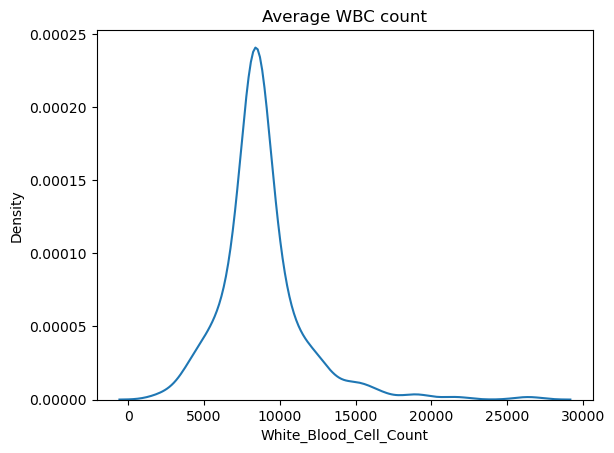

In [78]:
sns.kdeplot(data=WBC, x="White_Blood_Cell_Count")
plt.title("Average WBC count")
plt.show()

#### Average Blood sugar level in CKD patients

In [79]:
sugar=chronic_data[chronic_data["Class"]==1]
sugar

,Blood_Pressure,Specific_Gravity,Albumin,Sugar,Red_Blood_Cell,Blood_Urea,Serum_Creatinine,Sodium,Pottasium,Hemoglobin,White_Blood_Cell_Count,Red_Blood_Cell_Count,Hypertension,Class
0,80,1.020,1,0,1,36,1.2,137.53,4.63,15.40,7800,5.20,1,1
1,50,1.020,4,0,1,18,0.8,137.53,4.63,11.30,6000,4.71,0,1
2,80,1.010,2,3,1,53,1.8,137.53,4.63,9.60,7500,4.71,0,1
3,70,1.005,4,0,1,56,3.8,111.00,2.50,11.20,6700,3.90,1,1
4,80,1.010,2,0,1,26,1.4,137.53,4.63,11.60,7300,4.60,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,100,1.020,1,0,1,79,5.3,135.00,6.30,6.30,7200,2.60,1,1
246,110,1.015,3,0,0,215,15.2,120.00,5.70,8.60,5000,2.50,1,1
247,90,1.025,1,0,1,18,1.2,140.00,4.20,12.53,8406,4.71,0,1
248,70,1.010,1,3,0,55,1.7,138.00,4.50,12.60,10200,4.10,1,1


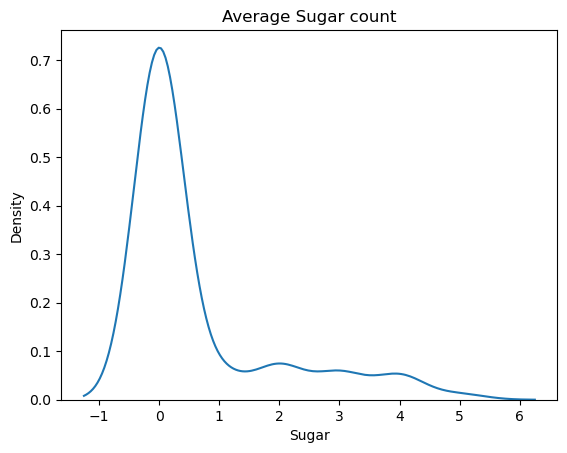

In [81]:
sns.kdeplot(data=WBC, x="Sugar")
plt.title("Average Sugar count")
plt.show()

#### RBC vs WBC in CKD patients

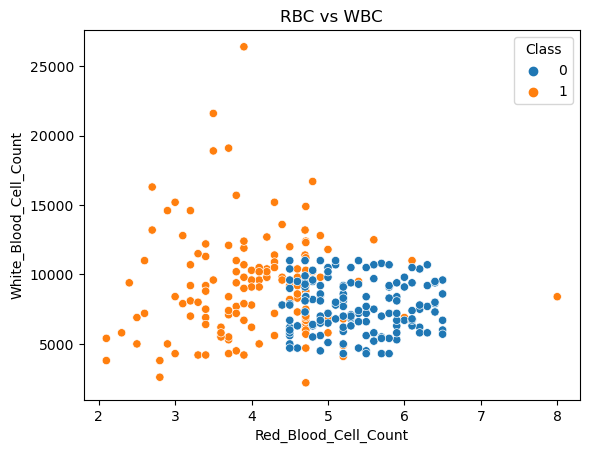

In [76]:
fig = sns.scatterplot(chronic_data, x="Red_Blood_Cell_Count", y="White_Blood_Cell_Count",hue="Class")
plt.title("RBC vs WBC")
plt.show()

#### Is blood pressure and Hypertension related?

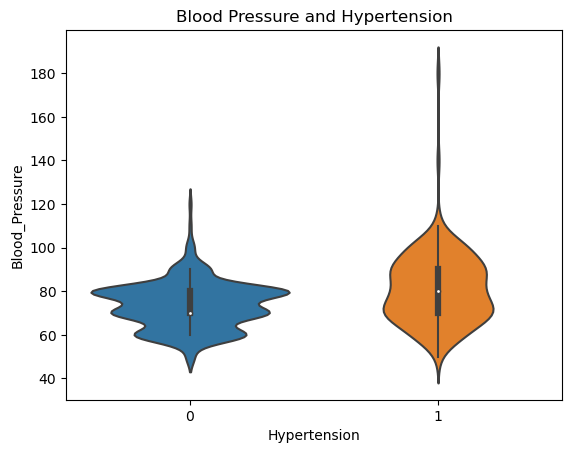

In [86]:
sns.violinplot(data=chronic_data, x="Hypertension", y="Blood_Pressure")
plt.title("Blood Pressure and Hypertension")
plt.show()

#### Sugar and Sodium in CKD patients

In [87]:
sugar_sodium=chronic_data[chronic_data["Class"]==1]
sugar_sodium

,Blood_Pressure,Specific_Gravity,Albumin,Sugar,Red_Blood_Cell,Blood_Urea,Serum_Creatinine,Sodium,Pottasium,Hemoglobin,White_Blood_Cell_Count,Red_Blood_Cell_Count,Hypertension,Class
0,80,1.020,1,0,1,36,1.2,137.53,4.63,15.40,7800,5.20,1,1
1,50,1.020,4,0,1,18,0.8,137.53,4.63,11.30,6000,4.71,0,1
2,80,1.010,2,3,1,53,1.8,137.53,4.63,9.60,7500,4.71,0,1
3,70,1.005,4,0,1,56,3.8,111.00,2.50,11.20,6700,3.90,1,1
4,80,1.010,2,0,1,26,1.4,137.53,4.63,11.60,7300,4.60,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,100,1.020,1,0,1,79,5.3,135.00,6.30,6.30,7200,2.60,1,1
246,110,1.015,3,0,0,215,15.2,120.00,5.70,8.60,5000,2.50,1,1
247,90,1.025,1,0,1,18,1.2,140.00,4.20,12.53,8406,4.71,0,1
248,70,1.010,1,3,0,55,1.7,138.00,4.50,12.60,10200,4.10,1,1


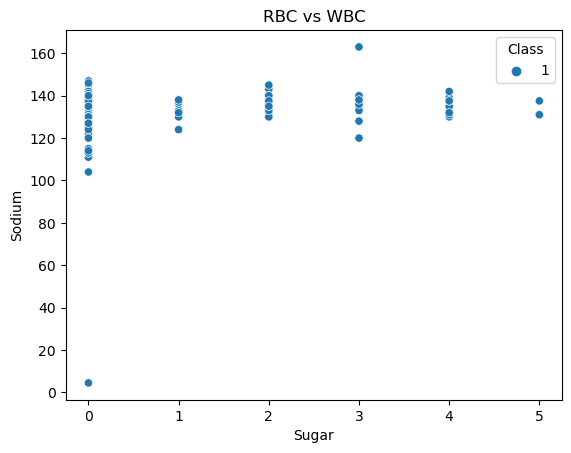

In [88]:
fig = sns.scatterplot(sugar_sodium, x="Sugar", y="Sodium",hue="Class")
plt.title("RBC vs WBC")
plt.show()

<h3 style="text-align: center; background-color: skyblue; color: maroon; padding: 20px; border-radius: 5px;">   THANK YOU  </h3>